## This file contains Association rules implementation for Road accidents in UK for the year 2019.

Libraries imported for data mining

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

/Users/darshinishridhar/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/darshinishridhar/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Read the data from csv file and display the number of rows and columns

In [2]:
accidents_data = pd.read_csv('Accidents_data_2019.csv', low_memory=False)
accidents_data.shape

(117536, 36)

Check for number of null values

In [3]:
accidents_data.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          28
location_northing_osgr                         28
longitude                                      28
latitude                                       28
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


Drop columns with NaN

In [4]:
accidents_data.drop(['location_easting_osgr','location_northing_osgr','longitude','latitude'], inplace=True,axis =1)
accidents_data

,accident_index,accident_year,accident_reference,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2019010128300,2019,010128300,1,3,2,3,18/02/2019,2,17:50,...,5,1,1,1,0,0,1,3,2,E01004762
1,2019010152270,2019,010152270,1,3,2,1,15/01/2019,3,21:45,...,9,4,1,1,0,0,1,3,2,E01003117
2,2019010155191,2019,010155191,1,3,2,1,01/01/2019,3,01:50,...,0,4,1,1,0,0,1,1,2,E01000943
3,2019010155192,2019,010155192,1,2,1,1,01/01/2019,3,01:20,...,0,4,1,1,0,0,1,1,2,E01000973
4,2019010155194,2019,010155194,1,3,2,2,01/01/2019,3,00:40,...,0,4,1,1,0,0,1,1,2,E01000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,2019,984106919,98,3,1,1,18/05/2019,7,01:00,...,0,1,1,2,0,0,2,1,-1,-1
117532,2019984107019,2019,984107019,98,3,4,1,30/05/2019,5,08:46,...,0,1,1,2,0,0,2,1,-1,-1
117533,2019984107219,2019,984107219,98,3,2,1,21/06/2019,6,15:30,...,0,1,1,1,0,0,2,2,-1,-1
117534,2019984107419,2019,984107419,98,3,1,1,29/06/2019,7,14:10,...,0,1,1,1,0,0,2,2,-1,-1


Get cardinality of column data

In [5]:
accidents_data.nunique()

accident_index                                 117536
accident_year                                       1
accident_reference                             117536
police_force                                       51
accident_severity                                   3
number_of_vehicles                                 16
number_of_casualties                               18
date                                              365
day_of_week                                         7
time                                             1440
local_authority_district                          380
local_authority_ons_district                      381
local_authority_highway                           208
first_road_class                                    6
first_road_number                                3174
road_type                                           6
speed_limit                                         7
junction_detail                                    11
junction_control            

Drop columns with cardinality of 1

In [6]:
accidents_data.drop(['accident_year','local_authority_district','urban_or_rural_area','trunk_road_flag']
                    , inplace=True,axis =1)
accidents_data

,accident_index,accident_reference,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_ons_district,...,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location
0,2019010128300,010128300,1,3,2,3,18/02/2019,2,17:50,E09000033,...,4202,0,5,1,1,1,0,0,3,E01004762
1,2019010152270,010152270,1,3,2,1,15/01/2019,3,21:45,E09000022,...,-1,9,9,4,1,1,0,0,3,E01003117
2,2019010155191,010155191,1,3,2,1,01/01/2019,3,01:50,E09000007,...,0,0,0,4,1,1,0,0,1,E01000943
3,2019010155192,010155192,1,2,1,1,01/01/2019,3,01:20,E09000007,...,510,0,0,4,1,1,0,0,1,E01000973
4,2019010155194,010155194,1,3,2,2,01/01/2019,3,00:40,E09000005,...,0,0,0,4,1,1,0,0,1,E01000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,984106919,98,3,1,1,18/05/2019,7,01:00,S12000006,...,-1,0,0,1,1,2,0,0,1,-1
117532,2019984107019,984107019,98,3,4,1,30/05/2019,5,08:46,S12000006,...,-1,0,0,1,1,2,0,0,1,-1
117533,2019984107219,984107219,98,3,2,1,21/06/2019,6,15:30,S12000006,...,721,0,0,1,1,1,0,0,2,-1
117534,2019984107419,984107419,98,3,1,1,29/06/2019,7,14:10,S12000006,...,0,0,0,1,1,1,0,0,2,-1


Derive month number from date column

In [7]:
accidents_data['month'] = pd.DatetimeIndex(accidents_data['date']).month

/Users/darshinishridhar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '18/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/darshinishridhar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '15/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/darshinishridhar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '13/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/darshinishridhar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '14/01/2019

Create a list of columns with high cardinality and revise list of items to be removed
get columns with cardinality greater than 12

In [8]:
acc = accidents_data.nunique()>12
high_cardinality_columns = (acc.index[acc].tolist())
high_cardinality_columns.remove('accident_reference')
high_cardinality_columns.append('did_police_officer_attend_scene_of_accident')
high_cardinality_columns

['accident_index',
 'police_force',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'time',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_number',
 'second_road_number',
 'lsoa_of_accident_location',
 'did_police_officer_attend_scene_of_accident']

drop columns as per the list created in the previous step

In [9]:
accidents_data.drop(high_cardinality_columns, inplace=True, axis=1)
accidents_data

,accident_reference,accident_severity,day_of_week,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,month
0,010128300,3,2,3,1,30,1,2,3,0,5,1,1,1,0,0,2
1,010152270,3,3,3,2,30,0,-1,-1,9,9,4,1,1,0,0,1
2,010155191,3,3,4,6,30,3,4,6,0,0,4,1,1,0,0,1
3,010155192,2,3,4,6,20,3,4,4,0,0,4,1,1,0,0,1
4,010155194,3,3,3,6,30,6,4,6,0,0,4,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,984106919,3,7,4,6,60,0,-1,-1,0,0,1,1,2,0,0,5
117532,984107019,3,5,3,6,60,0,-1,-1,0,0,1,1,2,0,0,5
117533,984107219,3,6,4,6,60,3,4,4,0,0,1,1,1,0,0,6
117534,984107419,3,7,6,6,30,3,4,6,0,0,1,1,1,0,0,6


Print summary information for the final dataset

In [10]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 17 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   accident_reference                       117536 non-null  object
 1   accident_severity                        117536 non-null  int64 
 2   day_of_week                              117536 non-null  int64 
 3   first_road_class                         117536 non-null  int64 
 4   road_type                                117536 non-null  int64 
 5   speed_limit                              117536 non-null  int64 
 6   junction_detail                          117536 non-null  int64 
 7   junction_control                         117536 non-null  int64 
 8   second_road_class                        117536 non-null  int64 
 9   pedestrian_crossing_human_control        117536 non-null  int64 
 10  pedestrian_crossing_physical_facilities  117

Plot number of cases as per the severity 

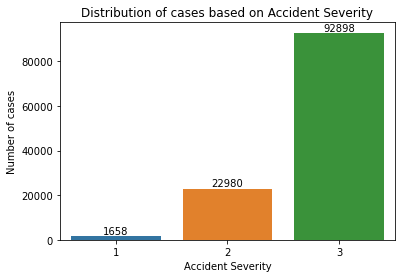

In [11]:
ax = sns.countplot(x = accidents_data['accident_severity'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Distribution of cases based on Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of cases')
plt.show()


Plot number of cases every month over the year 2019. Using the dictionary monthDict, get the name of the month for display

/Users/darshinishridhar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/darshinishridhar/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


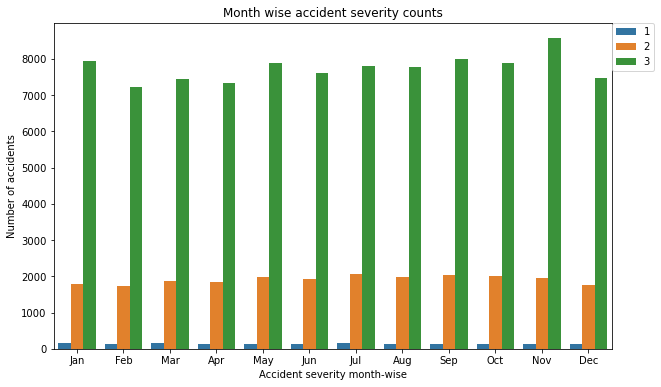

In [12]:
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
month_severity =  accidents_data.groupby(['month', 'accident_severity'])['accident_severity']\
                                .count()\
                                .reset_index(name="count")
month_severity_plot = month_severity.replace({"month": monthDict})

plt.figure(figsize=(10,6))
sns.barplot(x='month', y='count', hue='accident_severity', data=month_severity_plot)
plt.xlabel('Accident severity month-wise')
plt.ylabel('Number of accidents')
plt.title('Month wise accident severity counts')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


Get unique values for each column to ensure cardinality constraint is met

In [13]:
accidents_data.nunique()

accident_reference                         117536
accident_severity                               3
day_of_week                                     7
first_road_class                                6
road_type                                       6
speed_limit                                     7
junction_detail                                11
junction_control                                7
second_road_class                               7
pedestrian_crossing_human_control               5
pedestrian_crossing_physical_facilities         8
light_conditions                                6
weather_conditions                              9
road_surface_conditions                         7
special_conditions_at_site                     10
carriageway_hazards                             8
month                                          12
dtype: int64

Convert the data to encoded format to apply apriori algorithm

In [14]:
df_get_dummies = accidents_data.copy()

df_dummies = pd.get_dummies(data=df_get_dummies, columns=df_get_dummies.columns[1:])
df_dummies

,accident_reference,accident_severity_1,accident_severity_2,accident_severity_3,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,010128300,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,010152270,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,010155191,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,010155192,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,010155194,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,984106919,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
117532,984107019,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
117533,984107219,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
117534,984107419,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Drop the accident reference column 

In [15]:
accidents_data_final = df_dummies.drop(['accident_reference'], axis = 1)
accidents_data_final


,accident_severity_1,accident_severity_2,accident_severity_3,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
117532,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
117533,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
117534,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Data description file has been read and a dictionary of key and values have been created to interpret the results

In [16]:
desc_data = pd.read_csv('Road_Safety_Data_Guide.csv')
desc_data['fieldName_code'] = desc_data['fieldname'] + '_' + desc_data['code/format']
desc_dict = dict(zip(desc_data['fieldName_code'], desc_data['label']))
desc_dict

{nan: nan,
 'police_force_1': 'Metropolitan Police',
 'police_force_3': 'Cumbria',
 'police_force_4': 'Lancashire',
 'police_force_5': 'Merseyside',
 'police_force_6': 'Greater Manchester',
 'police_force_7': 'Cheshire',
 'police_force_10': 'Northumbria',
 'police_force_11': 'Durham',
 'police_force_12': 'North Yorkshire',
 'police_force_13': 'West Yorkshire',
 'police_force_14': 'South Yorkshire',
 'police_force_16': 'Humberside',
 'police_force_17': 'Cleveland',
 'police_force_20': 'West Midlands',
 'police_force_21': 'Staffordshire',
 'police_force_22': 'West Mercia',
 'police_force_23': 'Warwickshire',
 'police_force_30': 'Derbyshire',
 'police_force_31': 'Nottinghamshire',
 'police_force_32': 'Lincolnshire',
 'police_force_33': 'Leicestershire',
 'police_force_34': 'Northamptonshire',
 'police_force_35': 'Cambridgeshire',
 'police_force_36': 'Norfolk',
 'police_force_37': 'Suffolk',
 'police_force_40': 'Bedfordshire',
 'police_force_41': 'Hertfordshire',
 'police_force_42': 'Essex

Apply apriori algorithm to get frequent itemsets

In [17]:
acc_freq_itemsets = apriori(accidents_data_final, min_support = 0.1, use_colnames=True)
print(acc_freq_itemsets)

/Users/darshinishridhar/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


        support                                           itemsets
0      0.195515                              (accident_severity_2)
1      0.790379                              (accident_severity_3)
2      0.110051                                    (day_of_week_1)
3      0.141599                                    (day_of_week_2)
4      0.149724                                    (day_of_week_3)
...         ...                                                ...
15673  0.102973  (second_road_class_-1, road_type_6, accident_s...
15674  0.123145  (second_road_class_-1, road_type_6, accident_s...
15675  0.110979  (second_road_class_-1, road_type_6, accident_s...
15676  0.134172  (second_road_class_-1, accident_severity_3, li...
15677  0.130020  (second_road_class_-1, road_type_6, light_cond...

[15678 rows x 2 columns]


check if there are itemsets for severity level 1 with min support threshold

In [18]:
acc_freq_itemsets['itemsets'].apply(lambda k: 'accident_severity_1' in k).any()

False

get association rules where confidence threshold is 0.2

In [19]:
acc_assoc_rules = association_rules(acc_freq_itemsets, metric="confidence", min_threshold=0.2)
acc_assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(road_type_6),(accident_severity_2),0.725905,0.195515,0.151800,0.209119,1.069581,0.009875,1.017201
1,(accident_severity_2),(road_type_6),0.195515,0.725905,0.151800,0.776414,1.069581,0.009875,1.225904
2,(accident_severity_2),(speed_limit_30),0.195515,0.589649,0.108477,0.554830,0.940950,-0.006808,0.921785
3,(accident_severity_2),(pedestrian_crossing_human_control_0),0.195515,0.954491,0.190401,0.973847,1.020279,0.003784,1.740112
4,(pedestrian_crossing_physical_facilities_0),(accident_severity_2),0.766837,0.195515,0.156276,0.203792,1.042338,0.006348,1.010396
...,...,...,...,...,...,...,...,...,...
1353326,"(special_conditions_at_site_0, junction_detail_0)","(second_road_class_-1, road_type_6, light_cond...",0.401647,0.132564,0.130020,0.323716,2.441969,0.076776,1.282652
1353327,"(road_surface_conditions_1, pedestrian_crossin...","(second_road_class_-1, road_type_6, light_cond...",0.535751,0.169463,0.130020,0.242687,1.432095,0.039230,1.096689
1353328,(second_road_class_-1),"(road_type_6, light_conditions_1, junction_con...",0.417795,0.130037,0.130020,0.311204,2.393203,0.075691,1.263021
1353329,(junction_control_-1),"(second_road_class_-1, road_type_6, light_cond...",0.420007,0.130045,0.130020,0.309565,2.380443,0.075400,1.260010


Getting rules for accident severity 2 and sorting to get the rules with highest confidence

In [20]:
severity_2_rules = acc_assoc_rules[acc_assoc_rules['consequents'].apply(lambda x: 'accident_severity_2' in x)]
severity_2_rules.sort_values(by=['confidence'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5286,"(road_type_6, pedestrian_crossing_physical_fac...",(accident_severity_2),0.455716,0.195515,0.100378,0.220264,1.126586,0.011279,1.031741
31843,"(road_type_6, pedestrian_crossing_human_contro...",(accident_severity_2),0.555932,0.195515,0.121282,0.218160,1.115824,0.012589,1.028964
5293,"(road_type_6, pedestrian_crossing_physical_fac...",(accident_severity_2),0.559122,0.195515,0.121801,0.217843,1.114204,0.012484,1.028547
5228,"(road_type_6, pedestrian_crossing_human_contro...",(accident_severity_2),0.568813,0.195515,0.123800,0.217647,1.113200,0.012589,1.028289
124777,"(road_type_6, pedestrian_crossing_physical_fac...",(accident_severity_2),0.546496,0.195515,0.118925,0.217614,1.113032,0.012077,1.028246
...,...,...,...,...,...,...,...,...,...
5272,(road_type_6),"(pedestrian_crossing_human_control_0, special_...",0.725905,0.185900,0.145377,0.200270,1.077294,0.010431,1.017967
32225,"(pedestrian_crossing_human_control_0, pedestri...","(carriageway_hazards_0, accident_severity_2)",0.742896,0.190206,0.148720,0.200190,1.052494,0.007417,1.012484
32189,"(pedestrian_crossing_human_control_0, road_sur...","(special_conditions_at_site_0, accident_severi...",0.531922,0.190052,0.106461,0.200144,1.053099,0.005368,1.012617
124844,"(road_type_6, weather_conditions_1)","(pedestrian_crossing_human_control_0, carriage...",0.574862,0.182123,0.115046,0.200127,1.098858,0.010350,1.022509


This function has been used from the lab resources file - utils.py. Plot the metrics on a scatter plot

In [21]:

from matplotlib.pyplot import figure
def plot(supp, conf, lif):
    # supp: a list of calculated supports of the extracted rules.
    # conf: a list of calculated confidence of the extracted rules.
    # lif: a list of calculated lifts of the extracted rules.
    figure(figsize = (12, 9), dpi = 80)
    x = np.array(supp)
    y = np.array(conf)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    colors = np.array(lif)
    plt.scatter(x, y, c=colors, cmap='CMRmap')
    plt.colorbar()
    plt.show()

Plotting support, confidence and lift for severity level 2

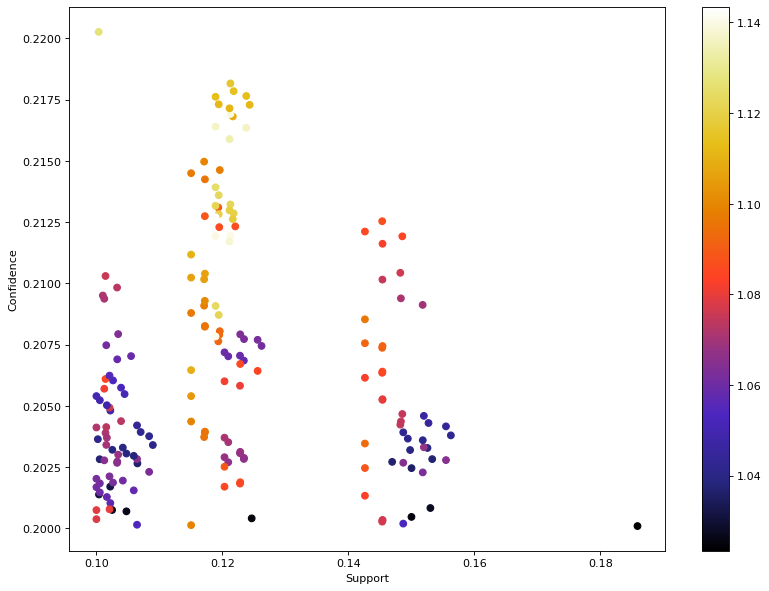

In [22]:
plot(severity_2_rules['support'], severity_2_rules['confidence'], severity_2_rules['lift'])


get the 10 rules with largest confidence values to get major factors responsible for accidents of severity level 3

In [23]:
largest_sev_2 = severity_2_rules.nlargest(10, 'confidence')
largest_sev_2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5286,"(road_type_6, pedestrian_crossing_physical_fac...",(accident_severity_2),0.455716,0.195515,0.100378,0.220264,1.126586,0.011279,1.031741
31843,"(road_type_6, pedestrian_crossing_human_contro...",(accident_severity_2),0.555932,0.195515,0.121282,0.218160,1.115824,0.012589,1.028964
5293,"(road_type_6, pedestrian_crossing_physical_fac...",(accident_severity_2),0.559122,0.195515,0.121801,0.217843,1.114204,0.012484,1.028547
5228,"(road_type_6, pedestrian_crossing_human_contro...",(accident_severity_2),0.568813,0.195515,0.123800,0.217647,1.113200,0.012589,1.028289
124777,"(road_type_6, pedestrian_crossing_physical_fac...",(accident_severity_2),0.546496,0.195515,0.118925,0.217614,1.113032,0.012077,1.028246
32009,"(carriageway_hazards_0, road_type_6, pedestria...",(accident_severity_2),0.549576,0.195515,0.119427,0.217308,1.111466,0.011977,1.027844
429,"(road_type_6, pedestrian_crossing_physical_fac...",(accident_severity_2),0.572225,0.195515,0.124336,0.217286,1.111354,0.012458,1.027815
31859,"(carriageway_hazards_0, road_type_6, pedestria...",(accident_severity_2),0.557906,0.195515,0.121146,0.217144,1.110628,0.012067,1.027629
31849,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, accident...",0.559122,0.190401,0.121282,0.216915,1.139252,0.014824,1.033858
5302,"(carriageway_hazards_0, road_type_6, pedestria...",(accident_severity_2),0.561156,0.195515,0.121665,0.216811,1.108926,0.011951,1.027192


List created to display the top 10 antecedents with the description from data dictionary

In [24]:
antecedents_list = []
for x in largest_sev_2['antecedents']:
    antecedents_list.append(list(x))
antecedents_list
[[(k, desc_dict[k] if desc_dict.get(k) else 'self_descriptive_key') for k in x] for x in antecedents_list]

[[('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres'),
  ('weather_conditions_1', 'Fine no high winds')],
 [('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_human_control_0', 'None within 50 metres '),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres'),
  ('special_conditions_at_site_0', 'None')],
 [('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres'),
  ('special_conditions_at_site_0', 'None')],
 [('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_human_control_0', 'None within 50 metres '),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres')],
 [('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metre

Getting rules for accident severity 3 and sorting to get the rules with highest confidence

In [25]:
severity_3_rules = acc_assoc_rules[acc_assoc_rules['consequents'].apply(lambda x: 'accident_severity_3' in x)]
severity_3_rules.sort_values(by=['confidence'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5882,"(first_road_class_3, light_conditions_1, speed...",(accident_severity_3),0.159355,0.790379,0.131951,0.828030,1.047636,0.006000,1.218938
127404,"(light_conditions_1, road_surface_conditions_1...",(accident_severity_3),0.121580,0.790379,0.100667,0.827992,1.047588,0.004573,1.218667
33340,"(road_surface_conditions_1, first_road_class_3...",(accident_severity_3),0.124447,0.790379,0.103041,0.827989,1.047585,0.004680,1.218650
33388,"(carriageway_hazards_0, first_road_class_3, li...",(accident_severity_3),0.153995,0.790379,0.127501,0.827956,1.047543,0.005787,1.218413
127451,"(light_conditions_1, carriageway_hazards_0, fi...",(accident_severity_3),0.149954,0.790379,0.124039,0.827177,1.046558,0.005518,1.212925
...,...,...,...,...,...,...,...,...,...
400666,(pedestrian_crossing_physical_facilities_0),"(road_type_6, accident_severity_3, weather_con...",0.766837,0.172985,0.153374,0.200009,1.156219,0.020723,1.033780
870282,"(road_surface_conditions_1, special_conditions...","(accident_severity_3, light_conditions_1, junc...",0.680617,0.160666,0.136129,0.200008,1.244868,0.026777,1.049178
739162,"(road_type_6, carriageway_hazards_0)","(second_road_class_-1, accident_severity_3, li...",0.708481,0.197846,0.141701,0.200007,1.010925,0.001531,1.002702
1117678,"(special_conditions_at_site_0, light_condition...","(second_road_class_-1, road_type_6, accident_s...",0.569979,0.194434,0.113999,0.200006,1.028657,0.003176,1.006965


Plotting the support, confidence and lift for severity level 3

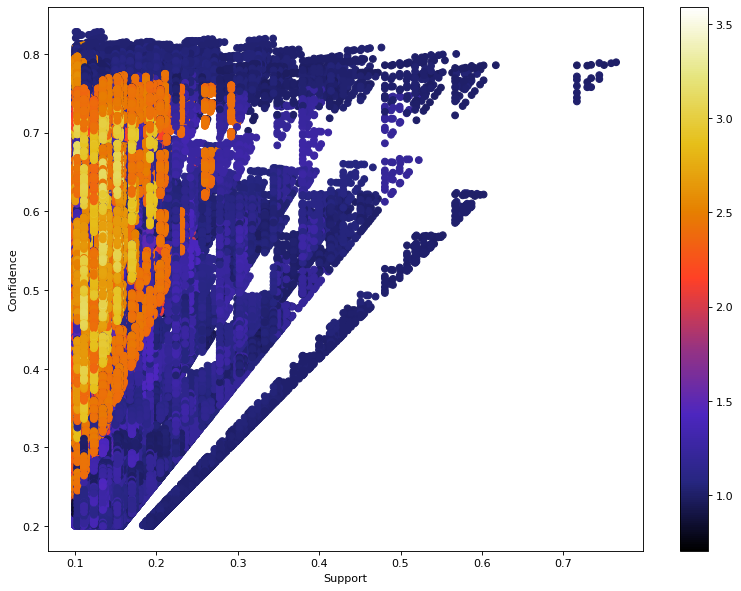

In [26]:
plot(severity_3_rules['support'], severity_3_rules['confidence'], severity_3_rules['lift'])

get the 10 rules with largest confidence values to get major factors responsible for accidents of severity level 3

In [27]:
largest_sev_3 = severity_3_rules.nlargest(10, 'confidence')
largest_sev_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5882,"(first_road_class_3, light_conditions_1, speed...",(accident_severity_3),0.159355,0.790379,0.131951,0.828030,1.047636,0.006000,1.218938
127404,"(light_conditions_1, road_surface_conditions_1...",(accident_severity_3),0.121580,0.790379,0.100667,0.827992,1.047588,0.004573,1.218667
33340,"(road_surface_conditions_1, first_road_class_3...",(accident_severity_3),0.124447,0.790379,0.103041,0.827989,1.047585,0.004680,1.218650
33388,"(carriageway_hazards_0, first_road_class_3, li...",(accident_severity_3),0.153995,0.790379,0.127501,0.827956,1.047543,0.005787,1.218413
127451,"(light_conditions_1, carriageway_hazards_0, fi...",(accident_severity_3),0.149954,0.790379,0.124039,0.827177,1.046558,0.005518,1.212925
33363,"(special_conditions_at_site_0, first_road_clas...",(accident_severity_3),0.152455,0.790379,0.126072,0.826943,1.046262,0.005574,1.211286
126905,"(light_conditions_1, carriageway_hazards_0, fi...",(accident_severity_3),0.144977,0.790379,0.119529,0.824472,1.043135,0.004943,1.194229
127357,"(light_conditions_1, weather_conditions_1, car...",(accident_severity_3),0.128199,0.790379,0.105670,0.824263,1.042871,0.004344,1.192812
345469,"(light_conditions_1, weather_conditions_1, car...",(accident_severity_3),0.125170,0.790379,0.103160,0.824157,1.042736,0.004228,1.192092
344955,"(light_conditions_1, carriageway_hazards_0, fi...",(accident_severity_3),0.141701,0.790379,0.116781,0.824137,1.042711,0.004784,1.191955


Create a list of major factors responsible for accidents of severity level 3

In [28]:
antecedants_list= []
for x in largest_sev_3['antecedents']:
      antecedants_list.append(x)
antecedants_list
[[(k, desc_dict[k] if desc_dict.get(k) else 'self_descriptive_key') for k in x] for x in antecedants_list]

[[('first_road_class_3', 'A'),
  ('light_conditions_1', 'Daylight'),
  ('speed_limit_30', 'self_descriptive_key')],
 [('light_conditions_1', 'Daylight'),
  ('road_surface_conditions_1', 'Dry'),
  ('carriageway_hazards_0', 'None'),
  ('first_road_class_3', 'A'),
  ('speed_limit_30', 'self_descriptive_key')],
 [('road_surface_conditions_1', 'Dry'),
  ('first_road_class_3', 'A'),
  ('light_conditions_1', 'Daylight'),
  ('speed_limit_30', 'self_descriptive_key')],
 [('carriageway_hazards_0', 'None'),
  ('first_road_class_3', 'A'),
  ('light_conditions_1', 'Daylight'),
  ('speed_limit_30', 'self_descriptive_key')],
 [('light_conditions_1', 'Daylight'),
  ('carriageway_hazards_0', 'None'),
  ('first_road_class_3', 'A'),
  ('special_conditions_at_site_0', 'None'),
  ('speed_limit_30', 'self_descriptive_key')],
 [('special_conditions_at_site_0', 'None'),
  ('first_road_class_3', 'A'),
  ('light_conditions_1', 'Daylight'),
  ('speed_limit_30', 'self_descriptive_key')],
 [('light_conditions_1', 

Get association rules with lift of threshold 1

In [29]:
acc_assoc_rules_lift = association_rules(acc_freq_itemsets, metric="lift", min_threshold=1)
acc_assoc_rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(road_type_6),(accident_severity_2),0.725905,0.195515,0.151800,0.209119,1.069581,0.009875,1.017201
1,(accident_severity_2),(road_type_6),0.195515,0.725905,0.151800,0.776414,1.069581,0.009875,1.225904
2,(pedestrian_crossing_human_control_0),(accident_severity_2),0.954491,0.195515,0.190401,0.199479,1.020279,0.003784,1.004953
3,(accident_severity_2),(pedestrian_crossing_human_control_0),0.195515,0.954491,0.190401,0.973847,1.020279,0.003784,1.740112
4,(pedestrian_crossing_physical_facilities_0),(accident_severity_2),0.766837,0.195515,0.156276,0.203792,1.042338,0.006348,1.010396
...,...,...,...,...,...,...,...,...,...
1344059,(road_surface_conditions_1),"(second_road_class_-1, road_type_6, light_cond...",0.700390,0.150822,0.130020,0.185639,1.230850,0.024386,1.042754
1344060,(carriageway_hazards_0),"(second_road_class_-1, road_type_6, light_cond...",0.968937,0.132385,0.130020,0.134188,1.013620,0.001747,1.002082
1344061,(pedestrian_crossing_physical_facilities_0),"(second_road_class_-1, road_type_6, light_cond...",0.766837,0.146730,0.130020,0.169553,1.155549,0.017502,1.027484
1344062,(pedestrian_crossing_human_control_0),"(second_road_class_-1, road_type_6, light_cond...",0.954491,0.130768,0.130020,0.136219,1.041681,0.005202,1.006310


Getting rules for accident severity 2 and sorting to get the rules with highest lift

In [30]:
severity_2_rules_lift = acc_assoc_rules[acc_assoc_rules['consequents'].apply(lambda x: 'accident_severity_2' in x)]
severity_2_rules_lift.sort_values(by=['lift'], ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
124798,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, carriage...",0.559122,0.186028,0.118925,0.212700,1.143375,0.014913,1.033878
124806,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, special_...",0.572225,0.182123,0.118925,0.207830,1.141151,0.014710,1.032451
31854,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, special_...",0.572225,0.185900,0.121282,0.211948,1.140116,0.014905,1.033053
124796,"(pedestrian_crossing_physical_facilities_0, ro...","(pedestrian_crossing_human_control_0, special_...",0.561156,0.185900,0.118925,0.211929,1.140014,0.014606,1.033028
31849,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, accident...",0.559122,0.190401,0.121282,0.216915,1.139252,0.014824,1.033858
...,...,...,...,...,...,...,...,...,...
5319,"(road_type_6, carriageway_hazards_0, light_con...",(accident_severity_2),0.510618,0.195515,0.102505,0.200746,1.026760,0.002672,1.006546
433,"(road_type_6, light_conditions_1)",(accident_severity_2),0.522078,0.195515,0.104776,0.200691,1.026476,0.002702,1.006476
5632,"(carriageway_hazards_0, special_conditions_at_...",(accident_severity_2),0.748375,0.195515,0.150022,0.200464,1.025314,0.003704,1.006190
32280,"(pedestrian_crossing_human_control_0, road_sur...",(accident_severity_2),0.622039,0.195515,0.124660,0.200405,1.025012,0.003042,1.006116


Plotting support, confidence and lift for severity level 2

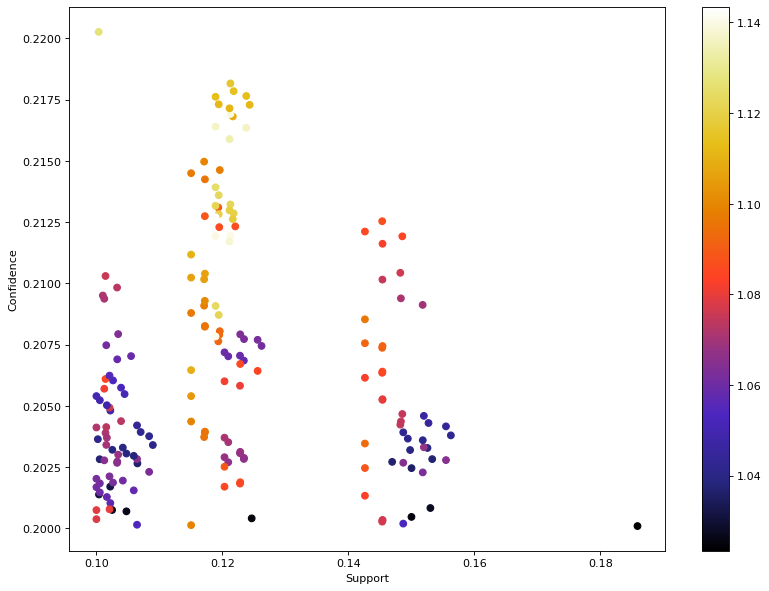

In [31]:
plot(severity_2_rules_lift['support'], severity_2_rules_lift['confidence'], severity_2_rules_lift['lift'])

get the 10 rules with largest confidence values to get major factors responsible for accidents of severity level 2

In [32]:
largest_lift_sev_2 = severity_2_rules_lift.nlargest(10, 'lift')
largest_lift_sev_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
124798,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, carriage...",0.559122,0.186028,0.118925,0.212700,1.143375,0.014913,1.033878
124806,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, special_...",0.572225,0.182123,0.118925,0.207830,1.141151,0.014710,1.032451
31854,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, special_...",0.572225,0.185900,0.121282,0.211948,1.140116,0.014905,1.033053
124796,"(pedestrian_crossing_physical_facilities_0, ro...","(pedestrian_crossing_human_control_0, special_...",0.561156,0.185900,0.118925,0.211929,1.140014,0.014606,1.033028
31849,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, accident...",0.559122,0.190401,0.121282,0.216915,1.139252,0.014824,1.033858
31872,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, carriage...",0.572225,0.186028,0.121146,0.211710,1.138055,0.014696,1.032580
124786,"(pedestrian_crossing_physical_facilities_0, ro...","(pedestrian_crossing_human_control_0, accident...",0.549576,0.190401,0.118925,0.216394,1.136518,0.014285,1.033171
5232,"(road_type_6, pedestrian_crossing_physical_fac...","(pedestrian_crossing_human_control_0, accident...",0.572225,0.190401,0.123800,0.216349,1.136281,0.014848,1.033112
31864,"(carriageway_hazards_0, road_type_6, pedestria...","(pedestrian_crossing_human_control_0, accident...",0.561156,0.190401,0.121146,0.215886,1.133849,0.014301,1.032502
5286,"(road_type_6, pedestrian_crossing_physical_fac...",(accident_severity_2),0.455716,0.195515,0.100378,0.220264,1.126586,0.011279,1.031741


Create a list of major factors responsible for accidents of severity level 2

In [33]:
antecedants_list = []
for x in largest_lift_sev_2['antecedents']:
    antecedants_list.append(x)
antecedants_list
[[(k, desc_dict[k] if desc_dict.get(k) else 'self_descriptive_key') for k in x] for x in antecedants_list]

[[('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres'),
  ('special_conditions_at_site_0', 'None')],
 [('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres')],
 [('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres')],
 [('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres'),
  ('road_type_6', 'Single carriageway'),
  ('carriageway_hazards_0', 'None')],
 [('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres'),
  ('special_conditions_at_site_0', 'None')],
 [('road_type_6', 'Single carriageway'),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres')],

Getting rules for accident severity 2 and sorting to get the rules with highest lift

In [34]:
severity_3_rules_lift = acc_assoc_rules[acc_assoc_rules['consequents'].apply(lambda x: 'accident_severity_3' in x)]
severity_3_rules_lift.sort_values(by=['lift'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1360,(weather_conditions_2),"(accident_severity_3, road_surface_conditions_2)",0.130122,0.214428,0.100165,0.769779,3.589920,0.072263,3.412252
1361,(road_surface_conditions_2),"(accident_severity_3, weather_conditions_2)",0.274461,0.103968,0.100165,0.364952,3.510233,0.071630,1.410968
1308947,"(pedestrian_crossing_human_control_0, speed_li...","(second_road_class_-1, accident_severity_3, ju...",0.155518,0.207902,0.102879,0.661524,3.181900,0.070547,2.340190
1266764,"(pedestrian_crossing_physical_facilities_0, ju...","(second_road_class_-1, road_type_6, accident_s...",0.161959,0.212616,0.109566,0.676508,3.181833,0.075131,2.434012
1266530,"(second_road_class_-1, pedestrian_crossing_phy...","(road_type_6, accident_severity_3, special_con...",0.161967,0.212607,0.109566,0.676472,3.181793,0.075131,2.433771
...,...,...,...,...,...,...,...,...,...
344283,"(road_type_6, weather_conditions_1, pedestrian...","(accident_severity_3, first_road_class_3)",0.439108,0.351160,0.108716,0.247583,0.705042,-0.045482,0.862340
125324,"(road_type_6, pedestrian_crossing_human_contro...","(accident_severity_3, first_road_class_3)",0.453180,0.351160,0.112153,0.247480,0.704748,-0.046986,0.862222
685136,"(road_type_6, weather_conditions_1, pedestrian...","(accident_severity_3, first_road_class_3)",0.436777,0.351160,0.108078,0.247443,0.704645,-0.045301,0.862180
126073,"(road_type_6, pedestrian_crossing_physical_fac...","(accident_severity_3, first_road_class_3)",0.446042,0.351160,0.110341,0.247377,0.704456,-0.046292,0.862105


Plotting support, confidence and lift for severity level 2

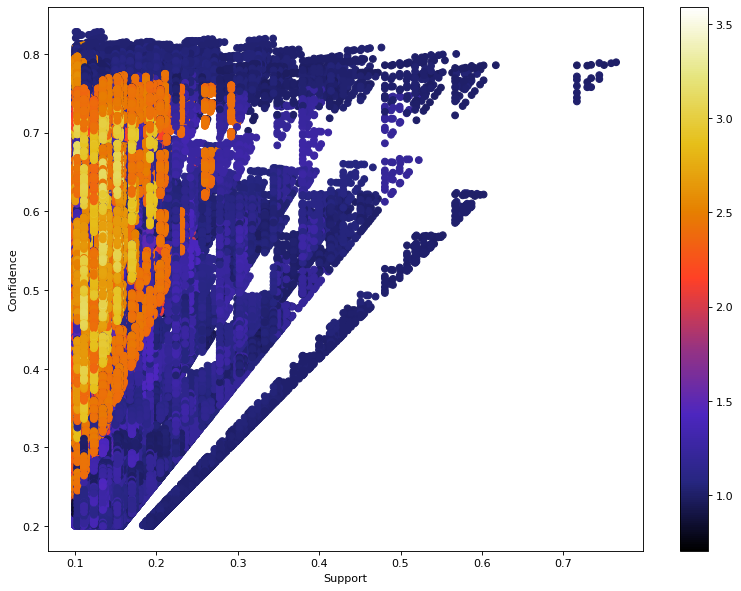

In [35]:
plot(severity_3_rules_lift['support'], severity_3_rules_lift['confidence'], severity_3_rules_lift['lift'])

get the 10 rules with largest confidence values to get major factors responsible for accidents of severity level 3

In [36]:
largest_lift_sev_3 = severity_3_rules_lift.nlargest(10, 'lift')
largest_lift_sev_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1360,(weather_conditions_2),"(accident_severity_3, road_surface_conditions_2)",0.130122,0.214428,0.100165,0.769779,3.589920,0.072263,3.412252
1361,(road_surface_conditions_2),"(accident_severity_3, weather_conditions_2)",0.274461,0.103968,0.100165,0.364952,3.510233,0.071630,1.410968
1308947,"(pedestrian_crossing_human_control_0, speed_li...","(second_road_class_-1, accident_severity_3, ju...",0.155518,0.207902,0.102879,0.661524,3.181900,0.070547,2.340190
1266764,"(pedestrian_crossing_physical_facilities_0, ju...","(second_road_class_-1, road_type_6, accident_s...",0.161959,0.212616,0.109566,0.676508,3.181833,0.075131,2.434012
1266530,"(second_road_class_-1, pedestrian_crossing_phy...","(road_type_6, accident_severity_3, special_con...",0.161967,0.212607,0.109566,0.676472,3.181793,0.075131,2.433771
1308590,"(second_road_class_-1, junction_control_-1, we...","(accident_severity_3, junction_detail_0, road_...",0.155518,0.207953,0.102879,0.661524,3.181119,0.070539,2.340039
368493,"(second_road_class_-1, junction_control_-1, sp...","(road_type_6, road_surface_conditions_1, accid...",0.200143,0.158488,0.100837,0.503826,3.178961,0.069117,1.696002
368534,"(junction_detail_0, speed_limit_30)","(second_road_class_-1, road_type_6, accident_s...",0.200160,0.158488,0.100837,0.503783,3.178690,0.069114,1.695856
1145220,"(pedestrian_crossing_human_control_0, speed_li...","(second_road_class_-1, accident_severity_3, ro...",0.155518,0.208481,0.102896,0.661634,3.173595,0.070474,2.339237
1308724,"(junction_control_-1, weather_conditions_1, pe...","(second_road_class_-1, accident_severity_3, ro...",0.155493,0.208481,0.102879,0.661633,3.173591,0.070462,2.339231


get the 10 rules with largest confidence values to get major factors responsible for accidents of severity level 3

In [37]:
antecedants_list = []
for x in largest_lift_sev_3['antecedents']:
    antecedants_list.append(x)
antecedants_list
[[(k, desc_dict[k] if desc_dict.get(k) else 'self_descriptive_key') for k in x] for x in antecedants_list]

[[('weather_conditions_2', 'Raining no high winds')],
 [('road_surface_conditions_2', 'Wet or damp')],
 [('pedestrian_crossing_human_control_0', 'None within 50 metres '),
  ('speed_limit_30', 'self_descriptive_key'),
  ('junction_detail_0', 'Not at junction or within 20 metres'),
  ('weather_conditions_1', 'Fine no high winds')],
 [('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres'),
  ('junction_detail_0', 'Not at junction or within 20 metres'),
  ('speed_limit_30', 'self_descriptive_key')],
 [('second_road_class_-1', 'self_descriptive_key'),
  ('pedestrian_crossing_physical_facilities_0',
   'No physical crossing facilities within 50 metres'),
  ('junction_control_-1', 'Data missing or out of range'),
  ('speed_limit_30', 'self_descriptive_key')],
 [('second_road_class_-1', 'self_descriptive_key'),
  ('junction_control_-1', 'Data missing or out of range'),
  ('weather_conditions_1', 'Fine no high winds'),
  ('pedestrian_crossing_human